In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from pandasql import sqldf

In [54]:
cwd = os.getcwd()

In [56]:
df_q2 = pd.read_csv("q2.txt", delimiter=" ", header = None)
df_q2.columns = ["time", "mat_size", "power", "num_th", "blk_size"]
df_q2

,time,mat_size,power,num_th,blk_size
0,81.13,2048,2,1,4.0
1,77.11,2048,2,1,8.0
2,84.83,2048,2,1,16.0
3,79.35,2048,2,1,32.0
4,77.16,2048,2,1,64.0
...,...,...,...,...,...
1120,1.07,512,16,16,4.0
1121,1.51,512,16,16,8.0
1122,0.88,512,16,16,16.0
1123,0.69,512,16,16,32.0


In [173]:
# 3*16*5*14
df_2048["num_th"].unique()

array([ 1,  2,  4,  8, 16])

In [60]:
def print_graphs(df_q2, fixattr1, a1_val ,fixattr2, a2_val , fixattr3, a3val , req_attr):
    
    q = '''SELECT * FROM df_q2 WHERE {} = {} AND {} = {} AND {} = {}'''
    q1 = q.format(fixattr1, a1_val, fixattr2, a2_val, fixattr3, a3val)
    
    temp_df = sqldf(q1)
    
    temp_df.plot(x=req_attr, y='time', kind='line')
    plt.xlabel(req_attr)
    plt.ylabel("Time (s)")
    plt.title("Time vs Number of Threads")
    plt.show()


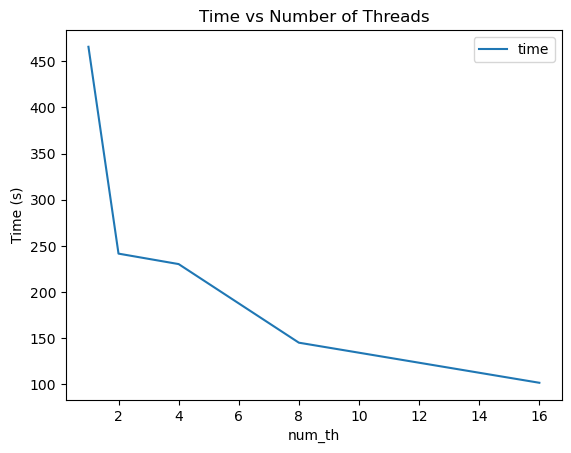

In [62]:
print_graphs(df_q2,"mat_size", 2048 , "power", 12 , "blk_size" , 8 , "num_th")


In [161]:
def print_graphs1(df_q2, fixattr1, a1_val ,fixattr2, a2_val , var_attr, var_vals , req_attr, print_attr, print_val):
    df_arr = []
    for val in var_vals:
        
        q = '''SELECT * FROM df_q2 WHERE {} = {} AND {} = {} AND {} = {}'''
        q1 = q.format(fixattr1, a1_val, fixattr2, a2_val, var_attr, val)
                
        temp_df = sqldf(q1)
        df_arr.append(temp_df)
        
    
    plt.figure(figsize=(16,6))
    for i in range(len(df_arr)):
        plt.plot(df_arr[i][req_attr], df_arr[i]['time'], label = var_attr + "=" + str(var_vals[i]), marker="o")

    plt.legend()
    plt.xlabel("Number of Threads")
    plt.ylabel("Time(sec)")
    plt.title("{} = {}".format(print_attr, print_val))
    plt.show()


In [162]:
blk_vals = [4,8,16,32,64]
pow_vals = [i for i in range(2,17)]
num_th = [1,  2,  4,  8, 16]
mat_sizes = [512,1024,2048]

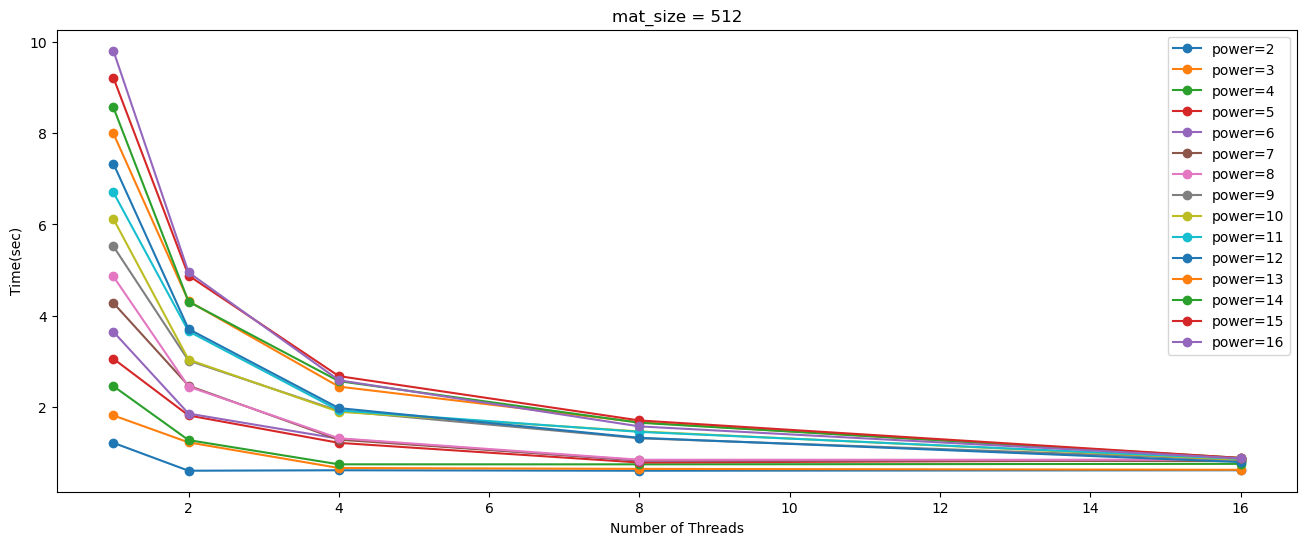

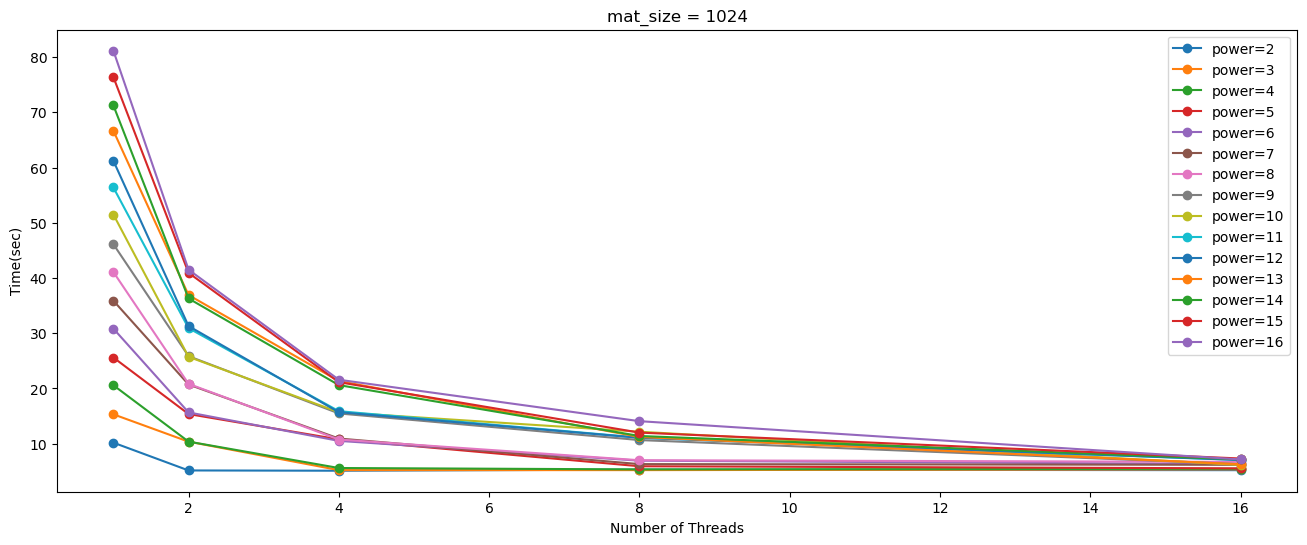

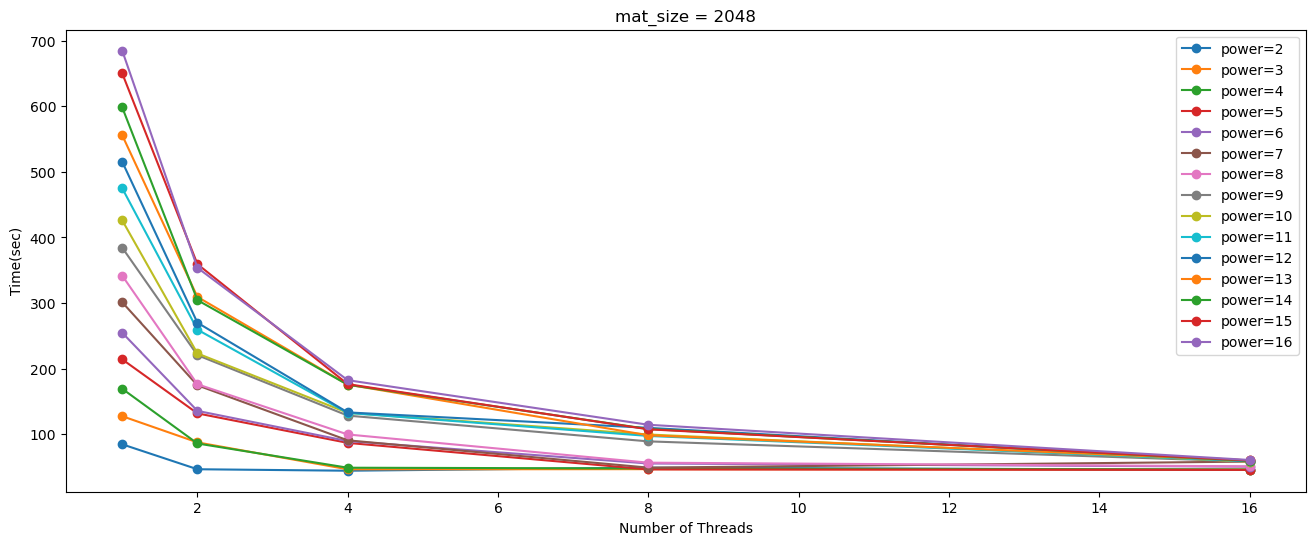

In [166]:
for matsize in mat_sizes:
    print_graphs1(df_q2,"mat_size", matsize , "blk_size", 16 , "power" , pow_vals , "num_th", "mat_size", matsize)

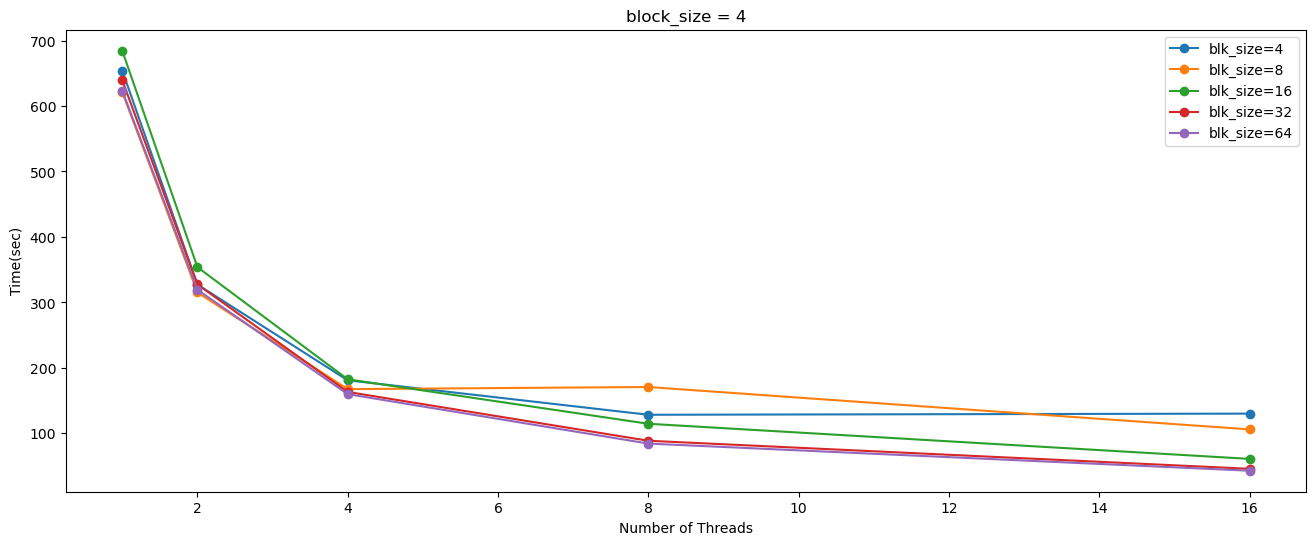

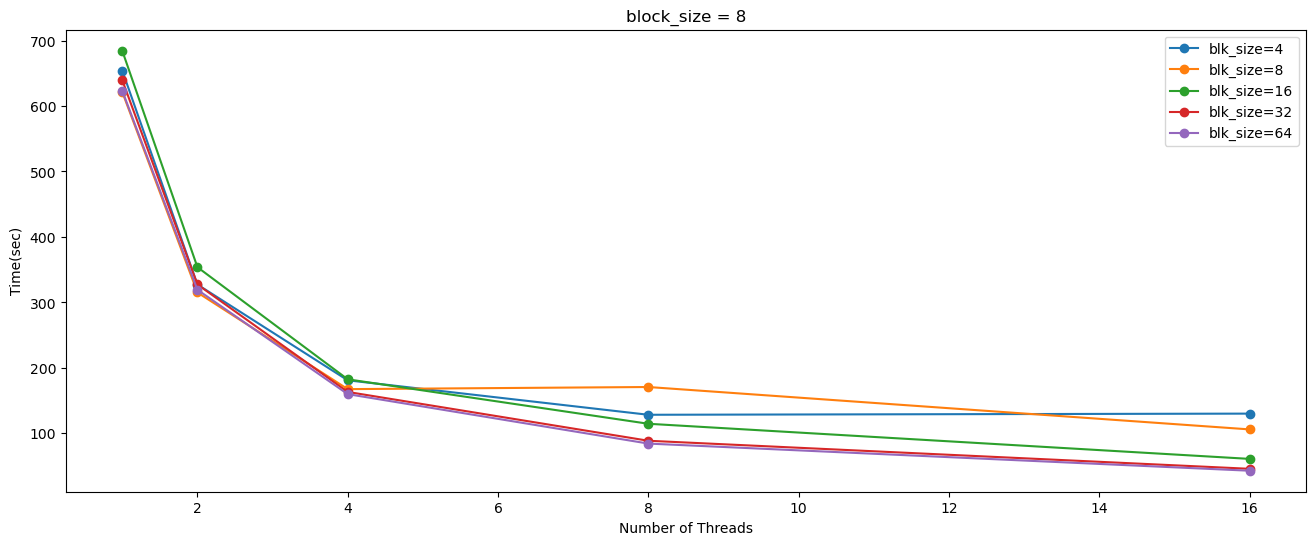

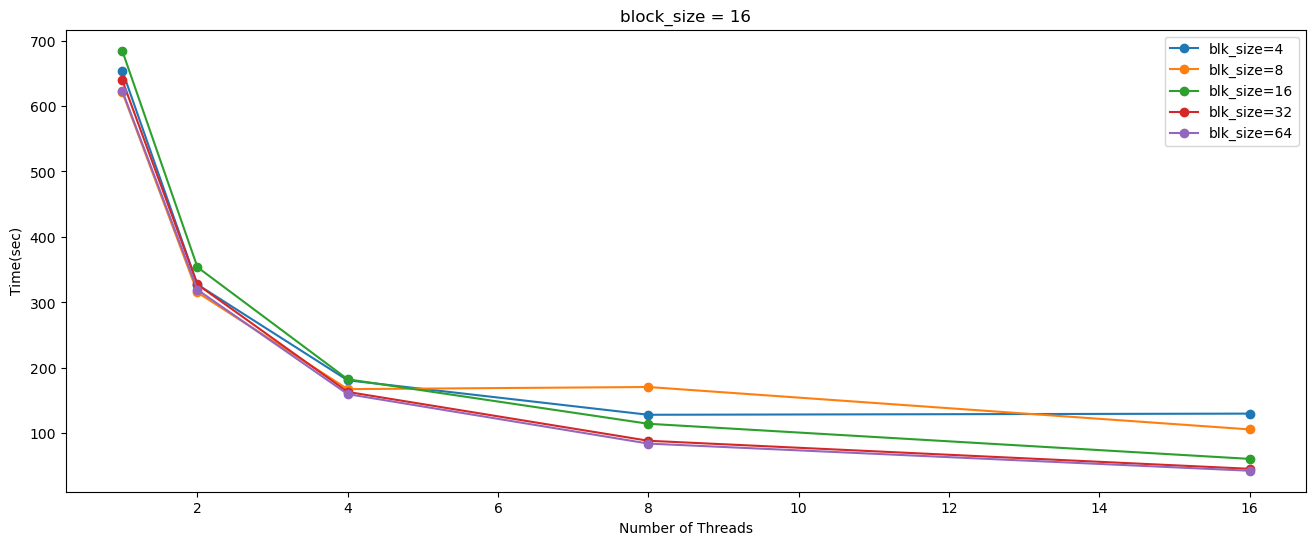

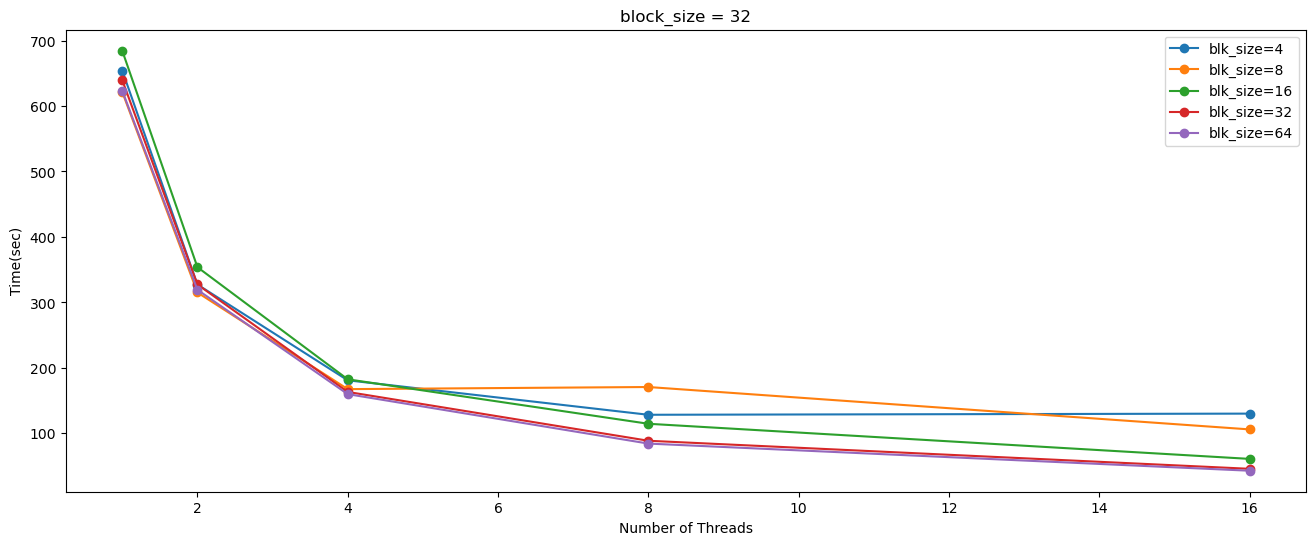

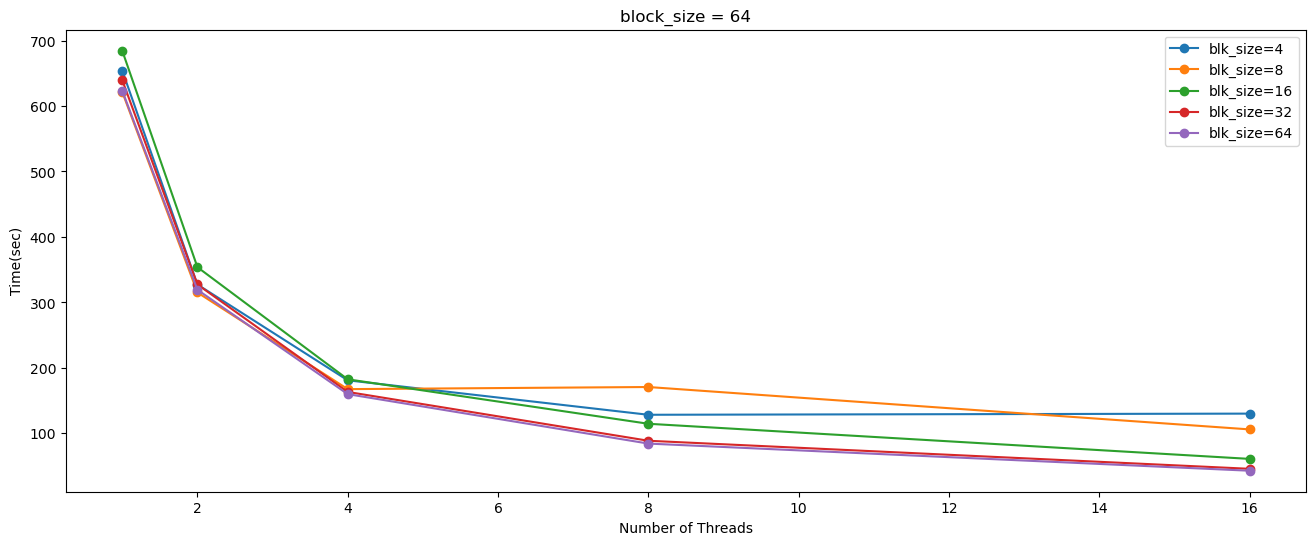

In [167]:
for blksize in blk_vals:
    print_graphs1(df_q2, "power",  16, "mat_size", 2048 , "blk_size" , blk_vals , "num_th", "block_size", blksize)

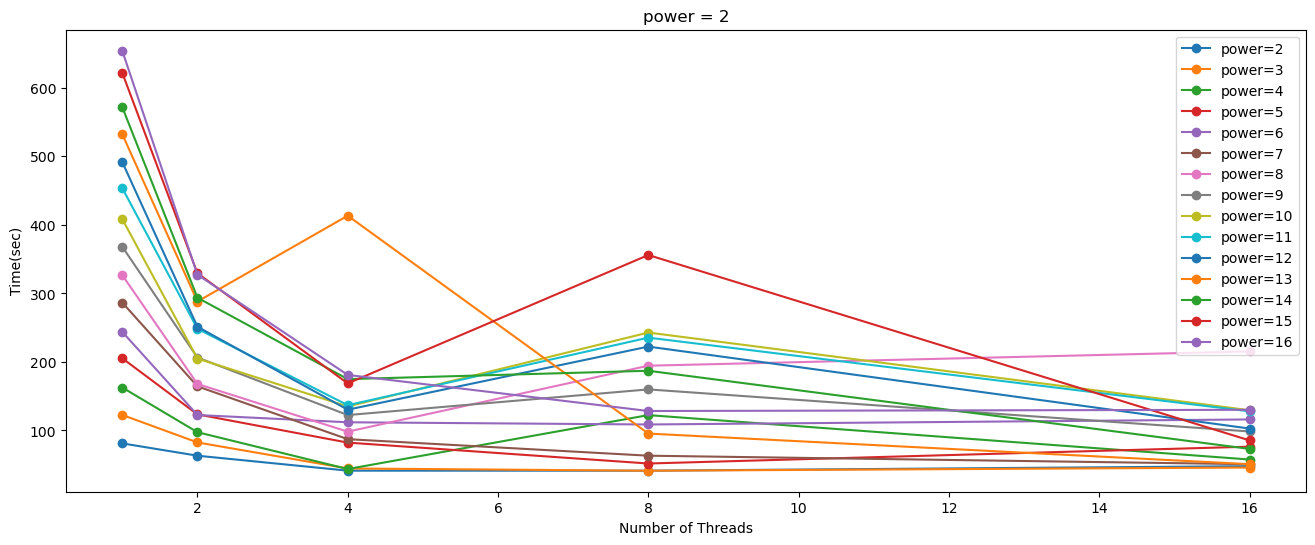

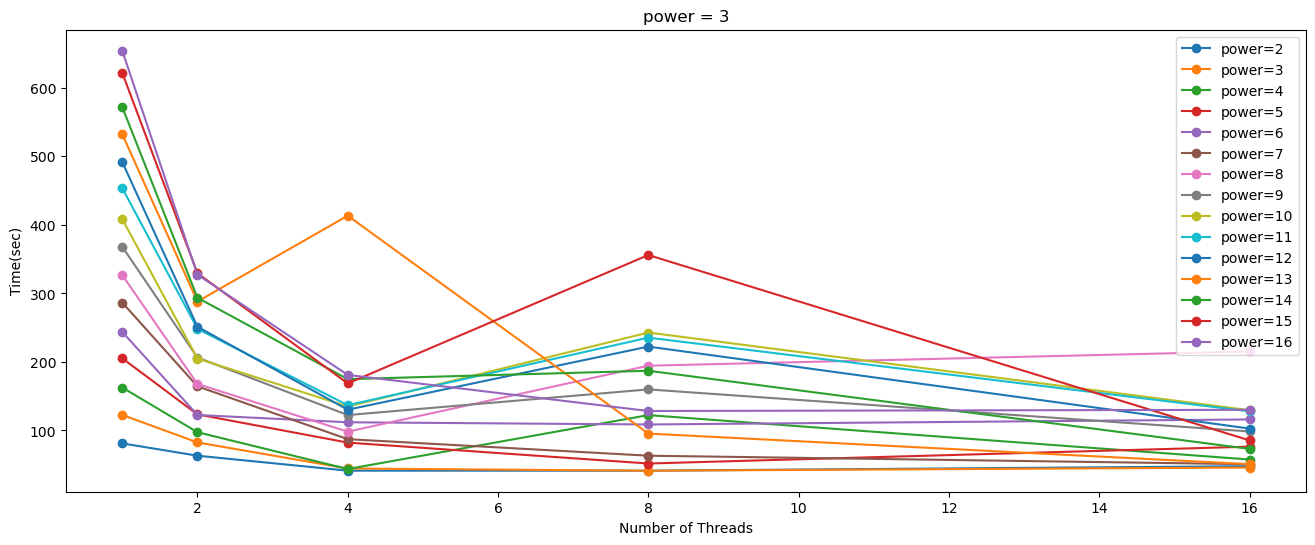

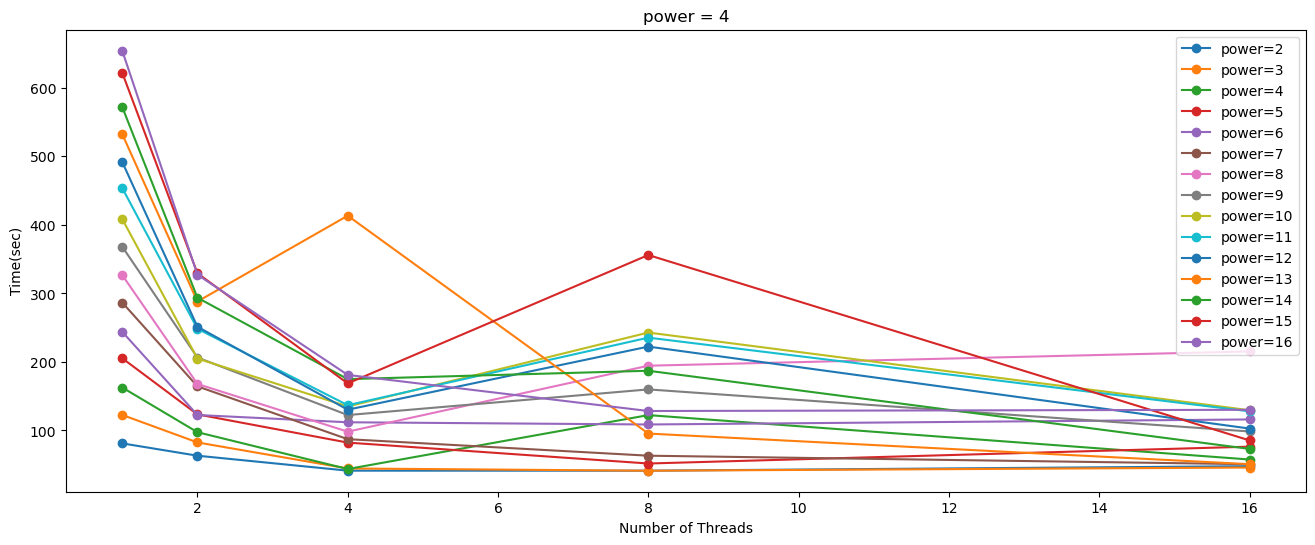

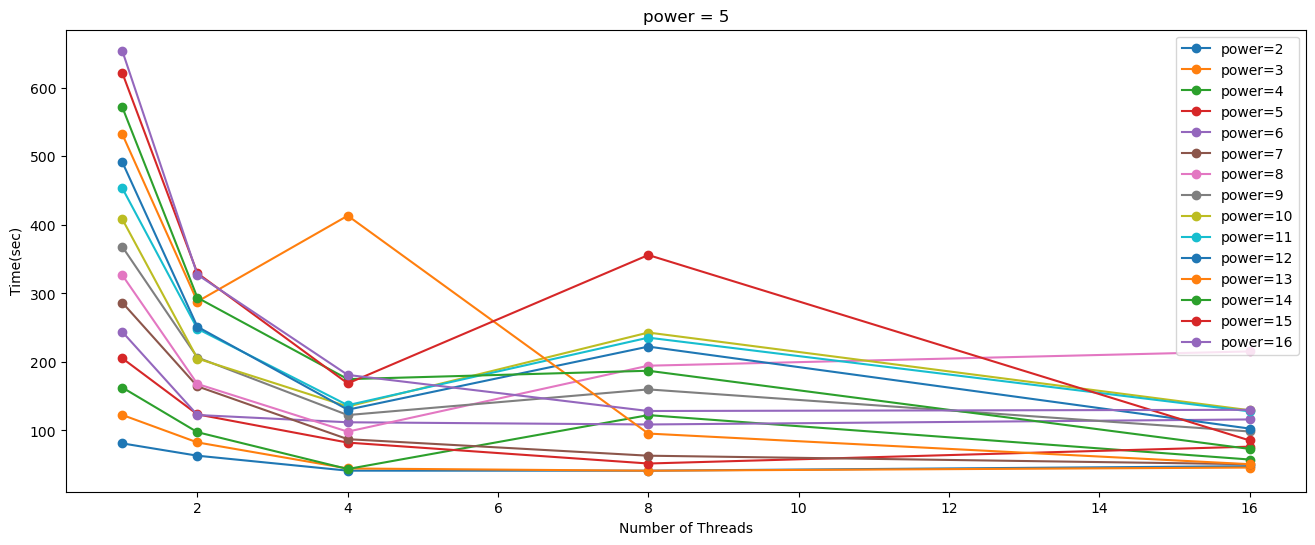

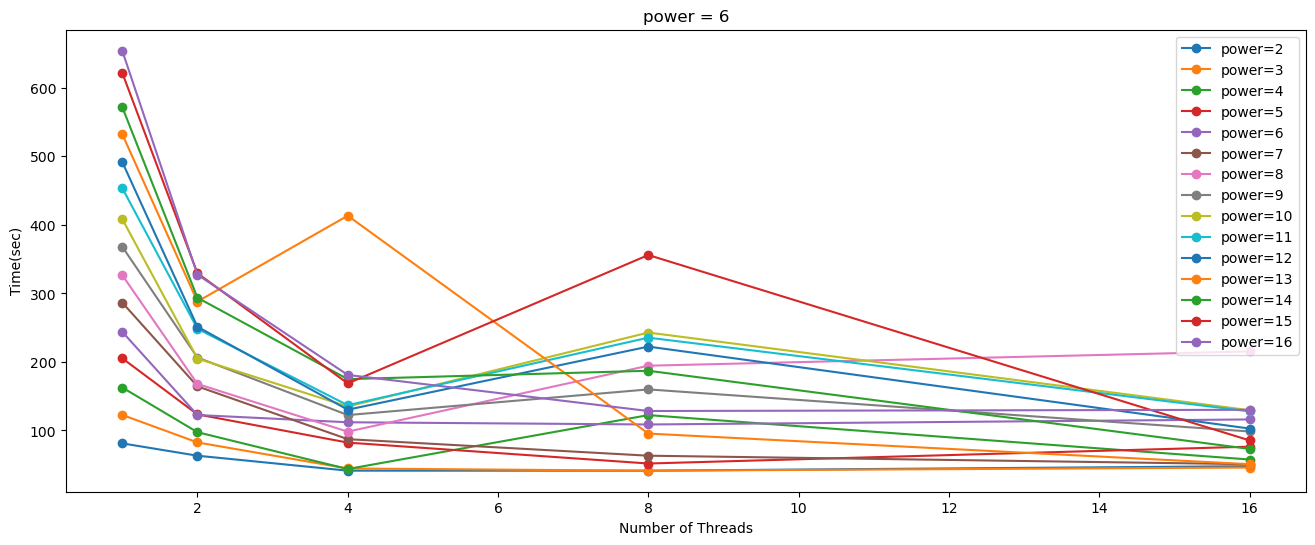

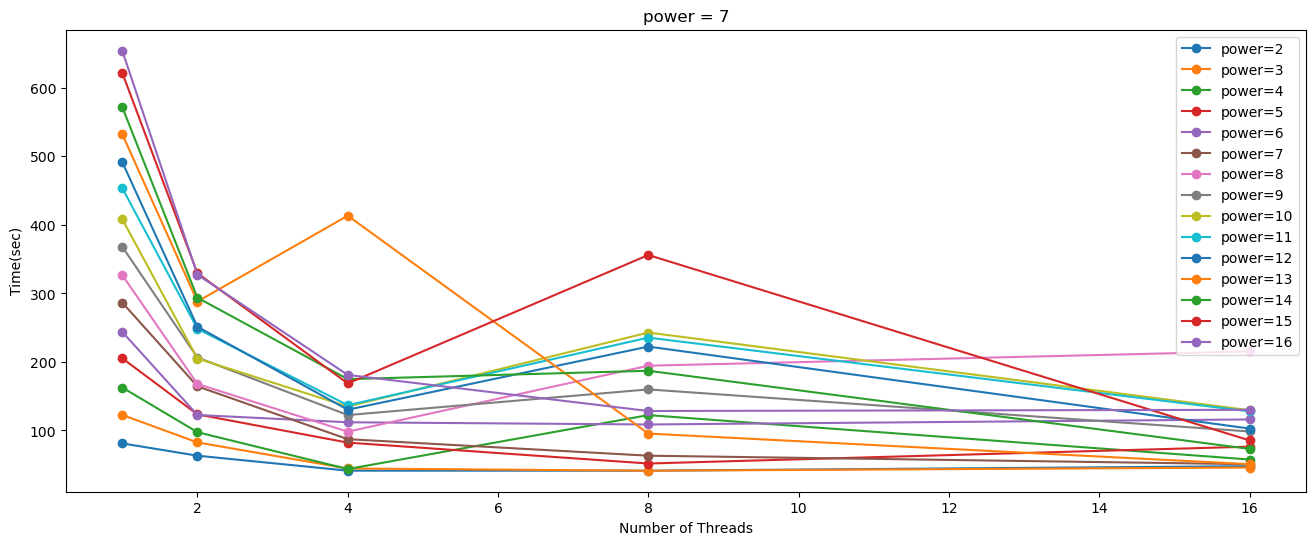

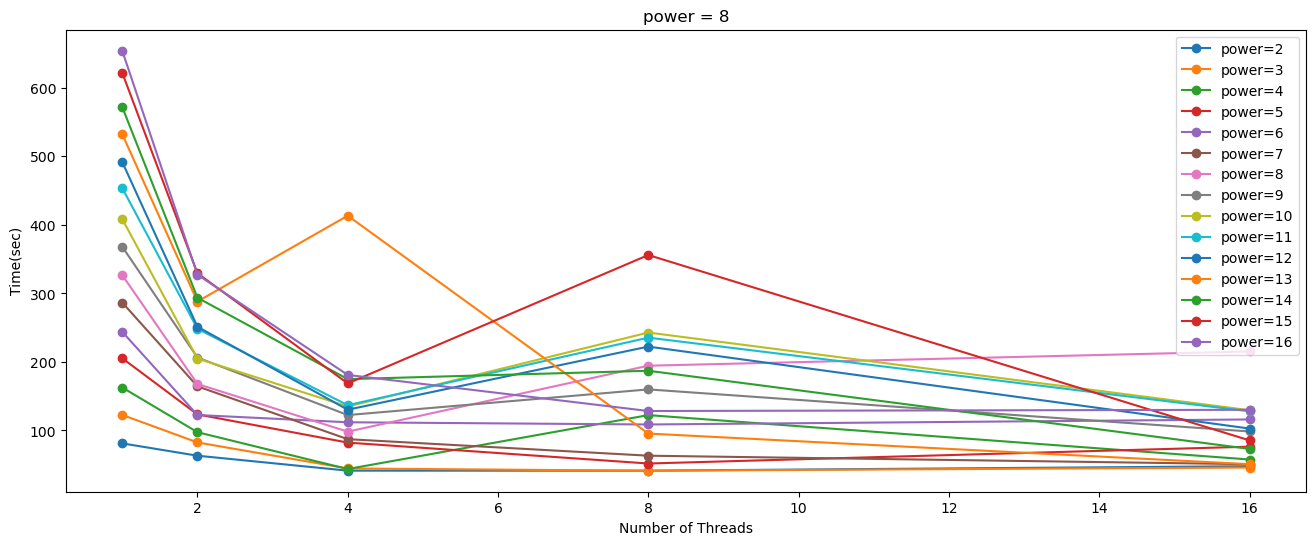

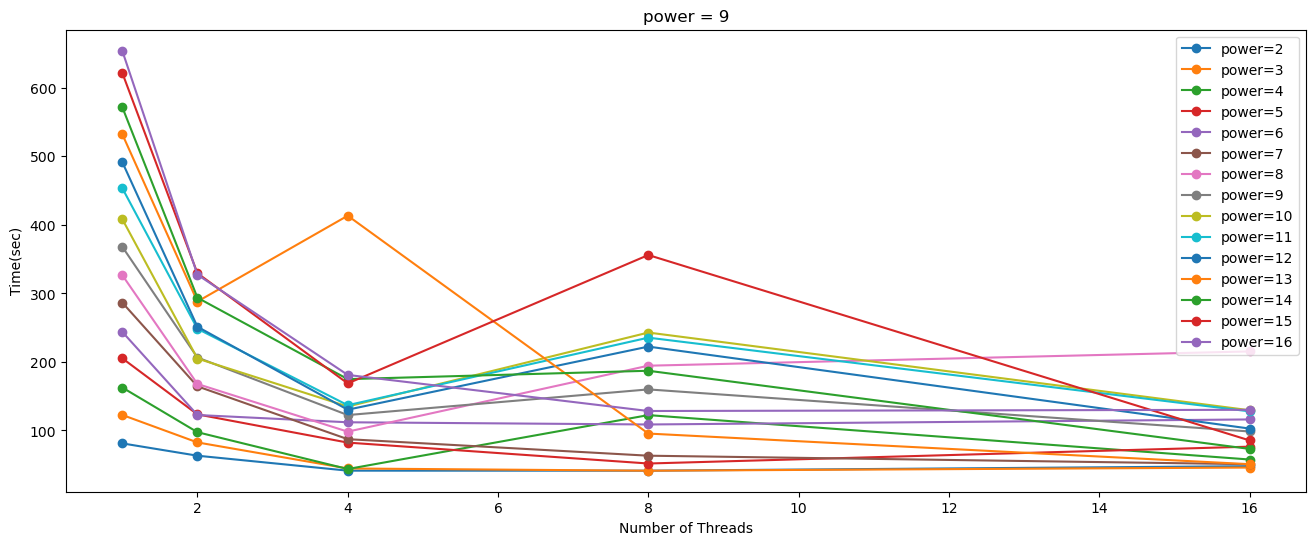

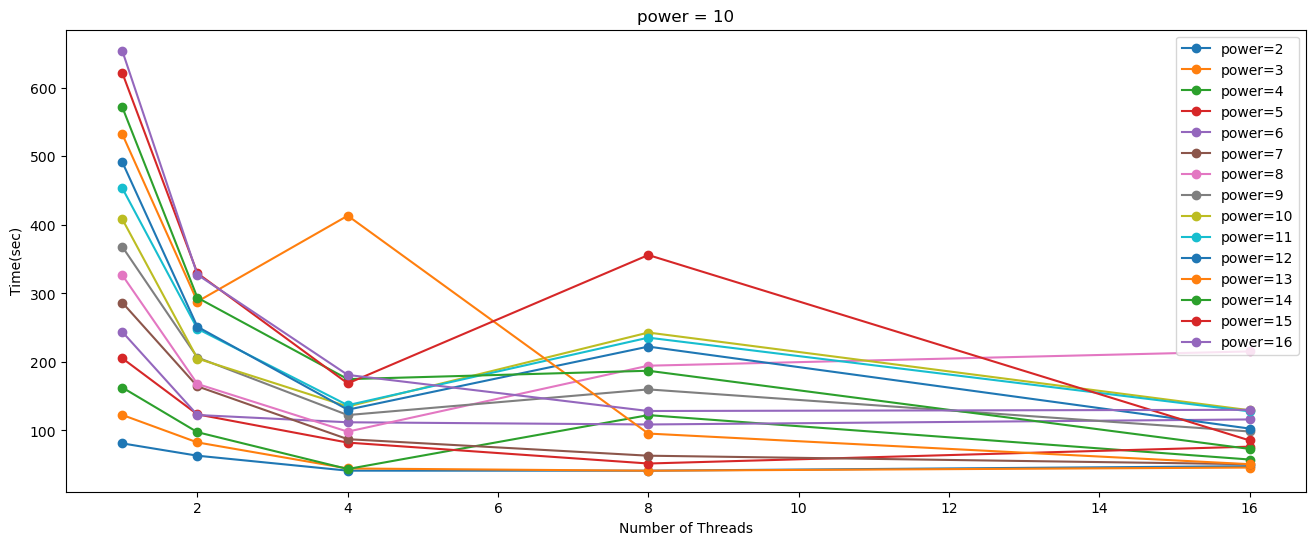

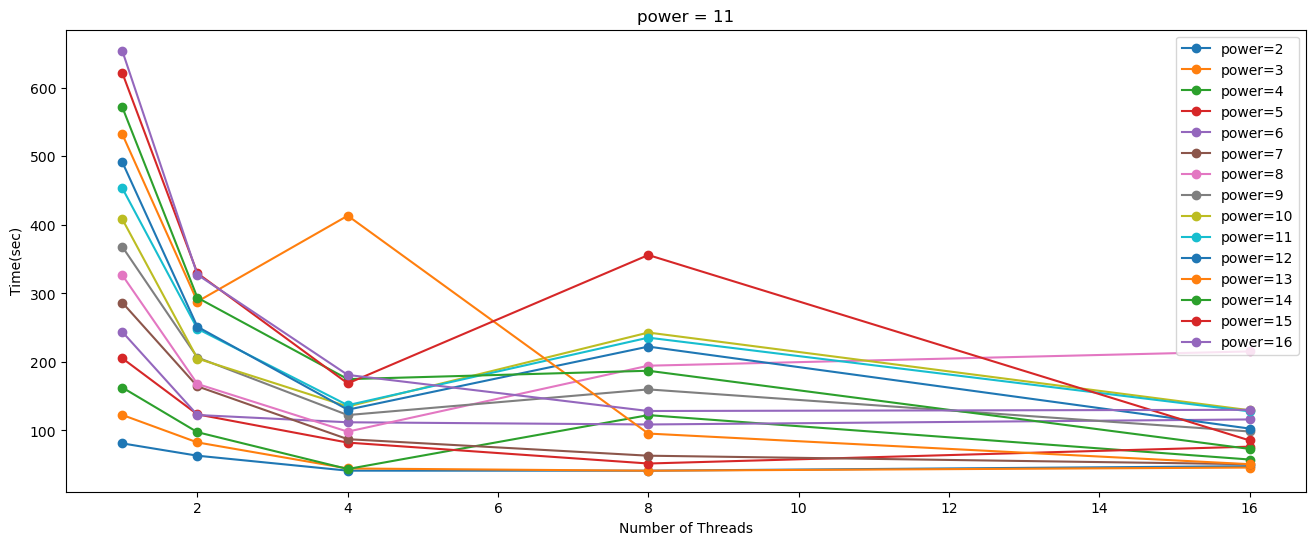

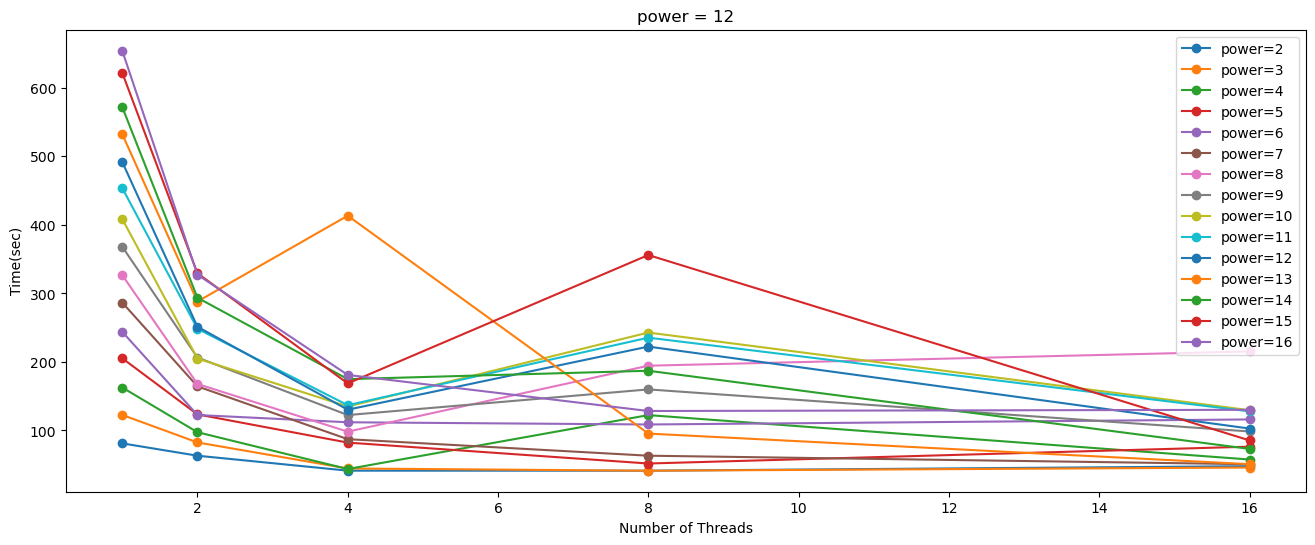

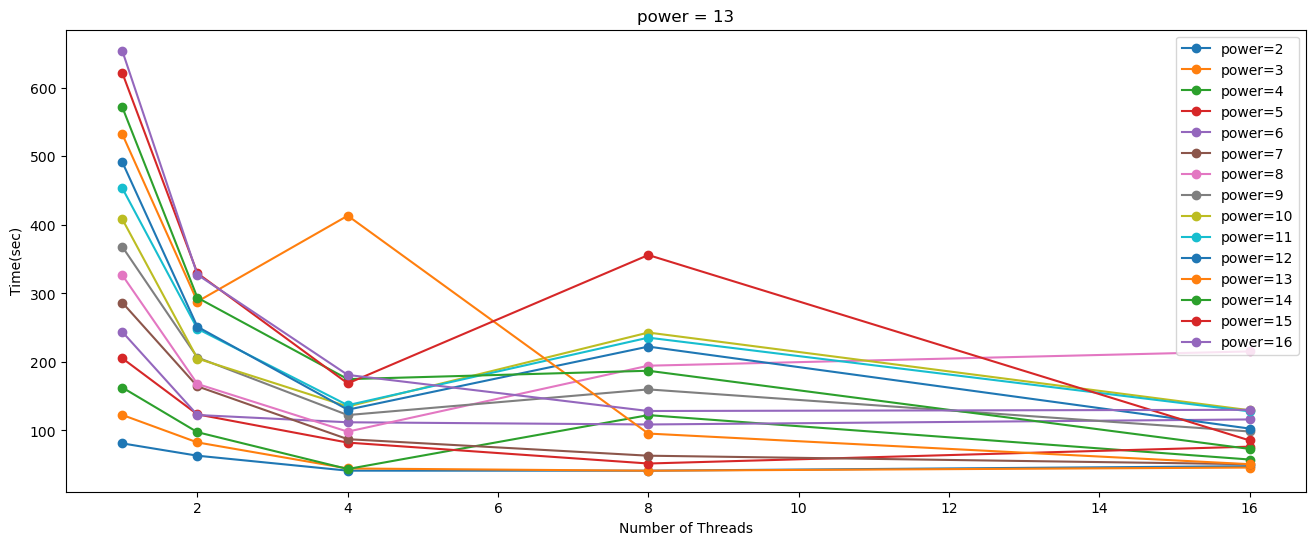

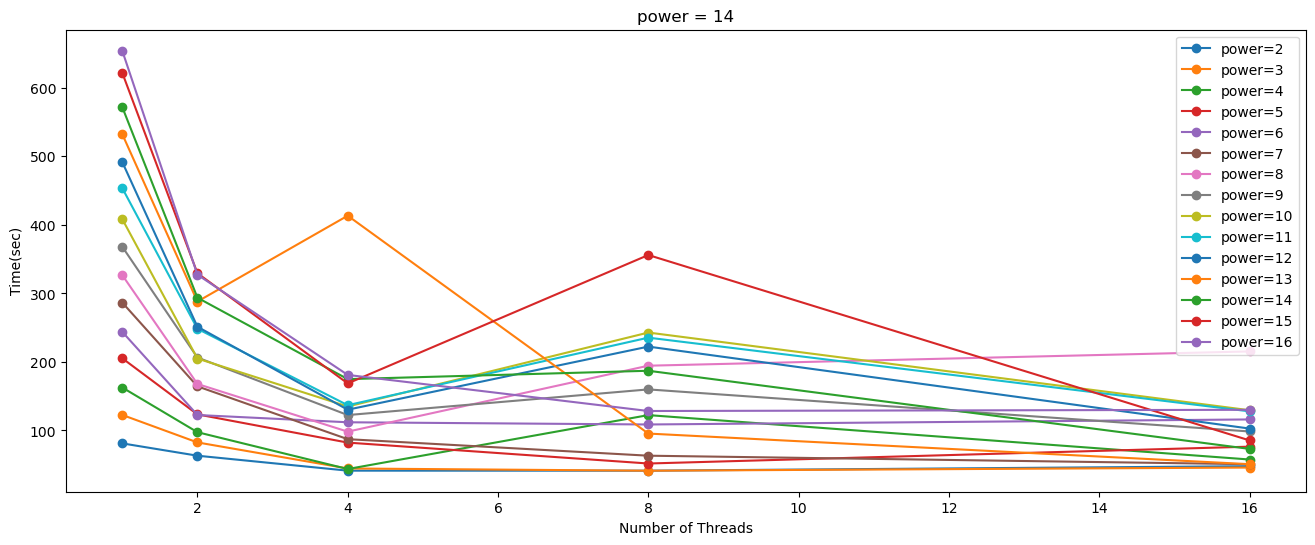

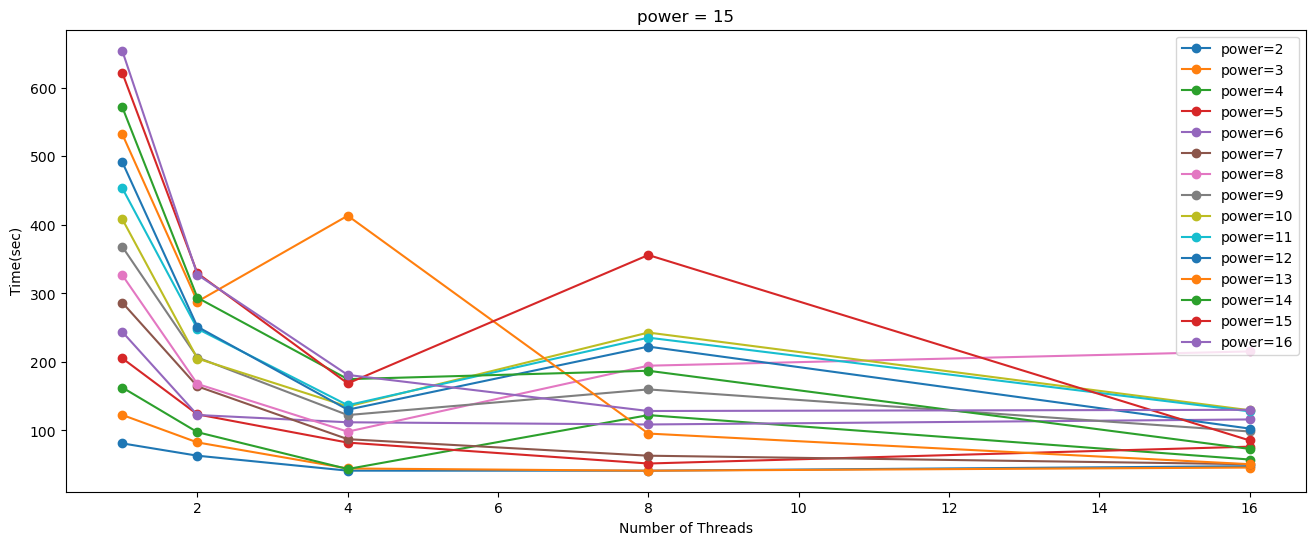

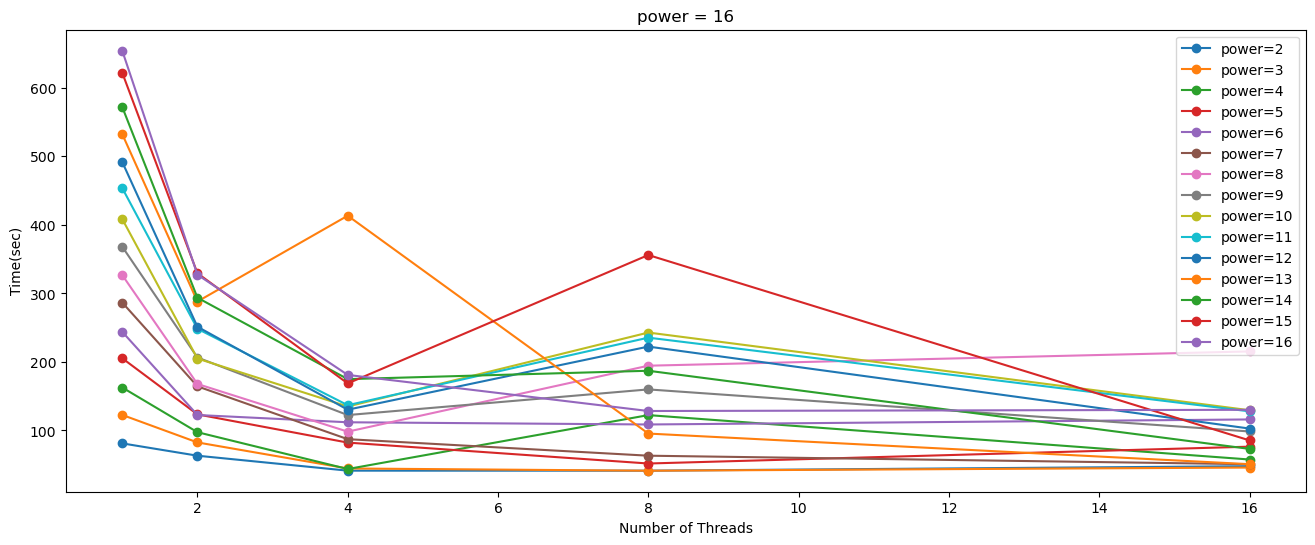

In [168]:
for power in pow_vals:
    print_graphs1(df_q2, "blk_size",  4, "mat_size", 2048 , "power" , pow_vals , "num_th", "power", power)

In [172]:
df_q2.to_csv("q2_op.dat", sep = "|")

In [175]:
# df_q2.to_csv("q2_op.csv")